In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import initializers
import numpy as np
from matplotlib import pyplot as plt

In [5]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargo Data

In [6]:
#folder = '/kaggle/input/fashion-mnist-itba-lab-2020/'
folder  = 'data/'
x = np.load(folder+'train_images.npy')
y = np.loadtxt(folder+'train_labels.csv', delimiter=',', skiprows=1)
x_test = np.load(folder+'test_images.npy')

In [7]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.1)

In [8]:
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_valid)

# Exploro Data

In [26]:
print(y_train)
print(y_train.shape)
print(np.max(y_train),np.min(y_train))
print(y_train_categorical.shape)
print(y_train[0])
print(y_train_categorical[0])
print(y_train[1])
print(y_train_categorical[1])


print(x_train.shape)
print(x_train[0].shape)
print(x_train.shape[1:])

[0. 4. 1. ... 2. 0. 2.]
(54000,)
9.0 0.0
(54000, 10)
0.0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4.0
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
(54000, 28, 28)
(28, 28)
(28, 28)


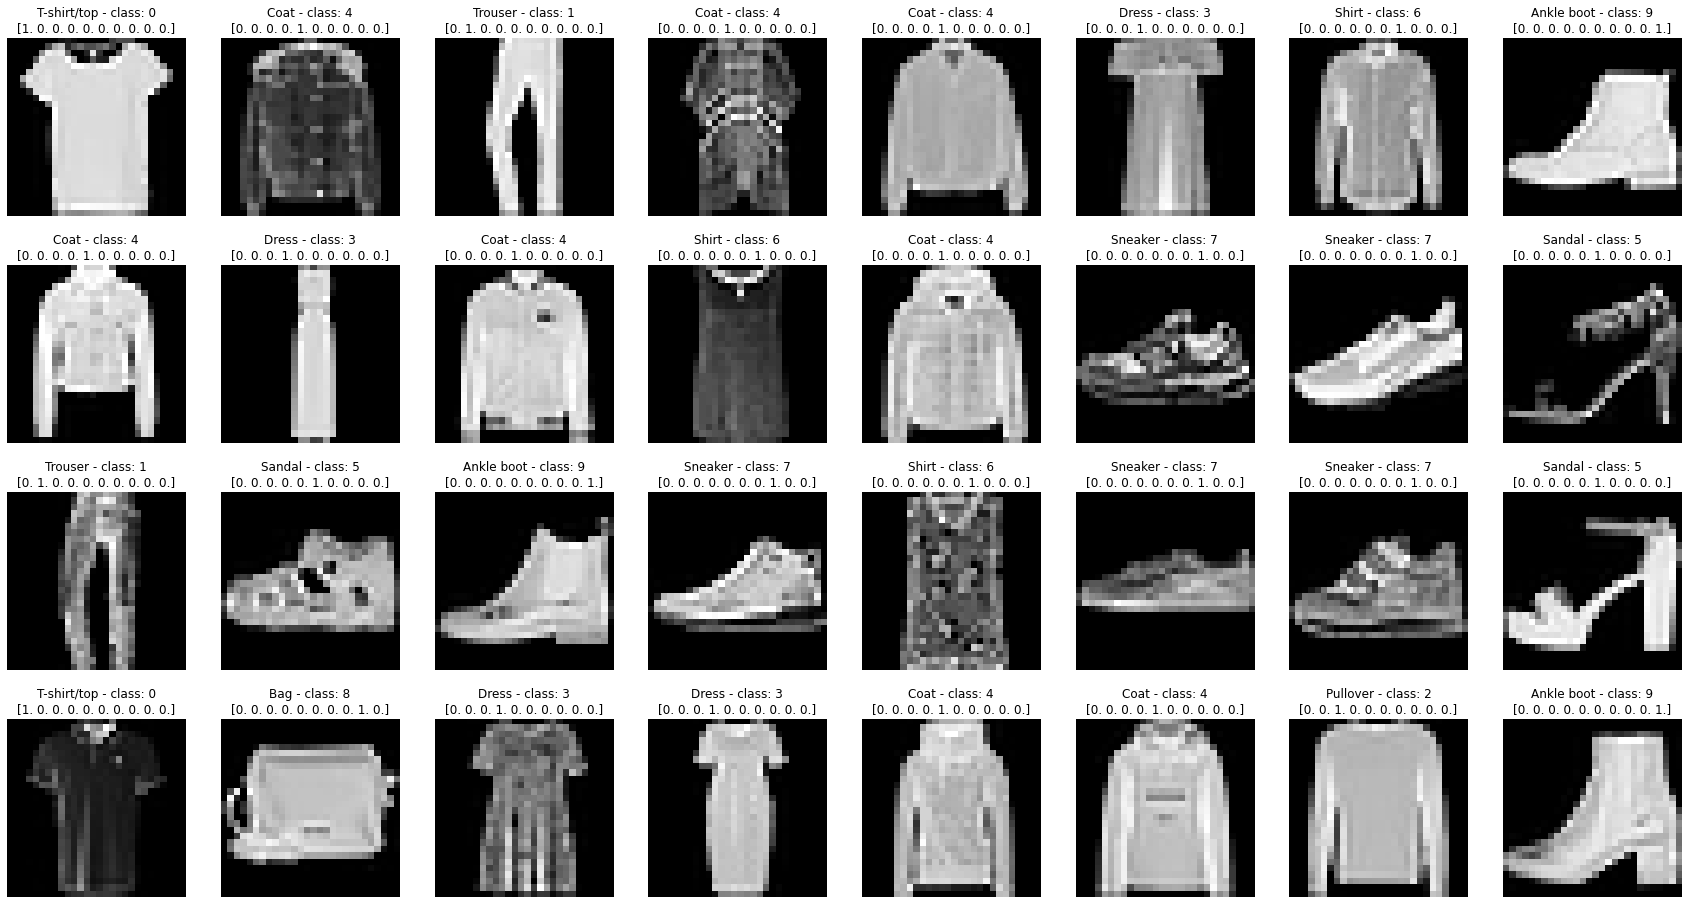

In [23]:
alto = 4
ancho = 8
f, axs = plt.subplots(alto, ancho, figsize=(30,4*alto))
axs = axs.reshape(-1)
for i in range(alto*ancho):
    axs[i].imshow(x_train[i], cmap='gray')
    axs[i].set_title(f'{classes[int(y_train[i])]} - class: {int(y_train[i])}\n{y_train_categorical[i]}')
    axs[i].axis('off')

# Armo regresión logística

In [27]:
output_size = 10
model_single_layer = Sequential()
model_single_layer.add(Flatten(input_shape=x_train.shape[1:]))
model_single_layer.add(Dense(output_size, name='Salida'))
model_single_layer.add(Activation('softmax'))
model_single_layer.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
Salida (Dense)               (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [29]:
lr = 0.000001 
SGD = optimizers.SGD(lr=lr)
model_single_layer.compile(loss = 'categorical_crossentropy', optimizer=SGD, metrics=['accuracy'])

In [30]:
batch_size = 512
model_single_layer.fit(x_train, 
                       y_train_categorical,
                       epochs=20, batch_size=batch_size, 
                       verbose=1, 
                       validation_data = (x_valid, y_val_categorical)
                      )

Epoch 1/20
106/106 [==============================] - 0s 4ms/step - loss: 122.0137 - accuracy: 0.1940 - val_loss: 98.5101 - val_accuracy: 0.2213
Epoch 2/20
106/106 [==============================] - 0s 3ms/step - loss: 90.7391 - accuracy: 0.2366 - val_loss: 83.2347 - val_accuracy: 0.2615
Epoch 3/20
106/106 [==============================] - 0s 3ms/step - loss: 79.0752 - accuracy: 0.2736 - val_loss: 73.6510 - val_accuracy: 0.2978
Epoch 4/20
106/106 [==============================] - 0s 2ms/step - loss: 70.8187 - accuracy: 0.3046 - val_loss: 66.3274 - val_accuracy: 0.3223
Epoch 5/20
106/106 [==============================] - 0s 3ms/step - loss: 64.3514 - accuracy: 0.3293 - val_loss: 60.4244 - val_accuracy: 0.3437
Epoch 6/20
106/106 [==============================] - 0s 3ms/step - loss: 59.1125 - accuracy: 0.3523 - val_loss: 55.5766 - val_accuracy: 0.3678
Epoch 7/20
106/106 [==============================] - 0s 3ms/step - loss: 54.8084 - accuracy: 0.3723 - val_loss: 51.6111 - val_accuracy

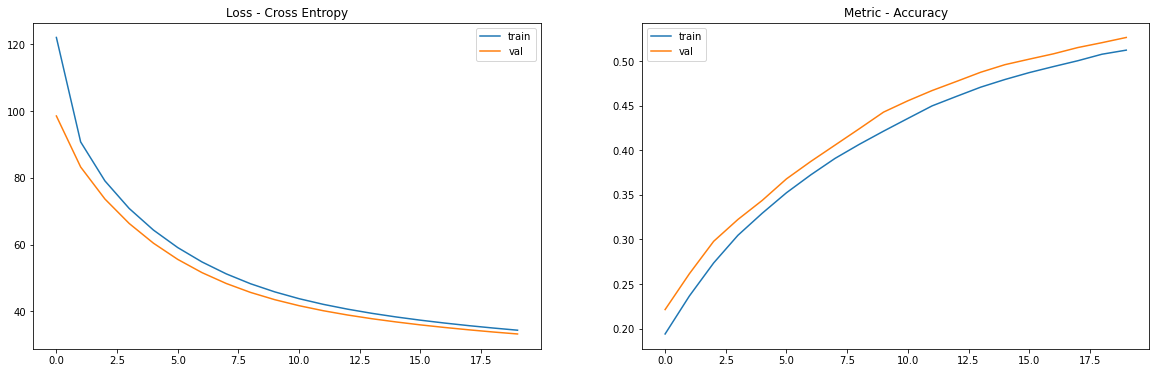

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
ax1.plot(model_single_layer.history.history['loss'], label='train')
ax1.plot(model_single_layer.history.history['val_loss'], label='val')
ax1.set_title('Loss - Cross Entropy')
ax1.legend()
ax2.plot(model_single_layer.history.history['accuracy'], label='train')
ax2.plot(model_single_layer.history.history['val_accuracy'], label='val')
ax2.set_title('Metric - Accuracy')
ax2.legend()
plt.show()

## Evaluo en validación

In [32]:
loss, acc = model_single_layer.evaluate(x_valid, y_val_categorical, verbose=0)
print(acc, loss)

0.5263333320617676 33.24885559082031


## Predicciones en test

In [33]:
# Calculo probabilidades de cada clase para cada observación
test_prediction = model_single_layer.predict(x_test)
print(test_prediction.shape)

(10000, 10)


In [34]:
# Calculo clase
test_labels = np.argmax(test_prediction, axis = 1)
print(test_labels)

[3 2 9 ... 2 2 7]


# Armo CSV para submitear

In [35]:
import pandas
df = pandas.DataFrame(data={"Category": test_labels}).astype(int)
df.to_csv("./submission.csv", sep=',',index=True,  index_label='Id')